In [2]:
import pandas as pd
df = pd.read_excel('C:/temp/geo_comment.xlsx')
df1 = pd.read_excel('C:/temp/geo.xlsx')
df1.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

No handles with labels found to put in legend.


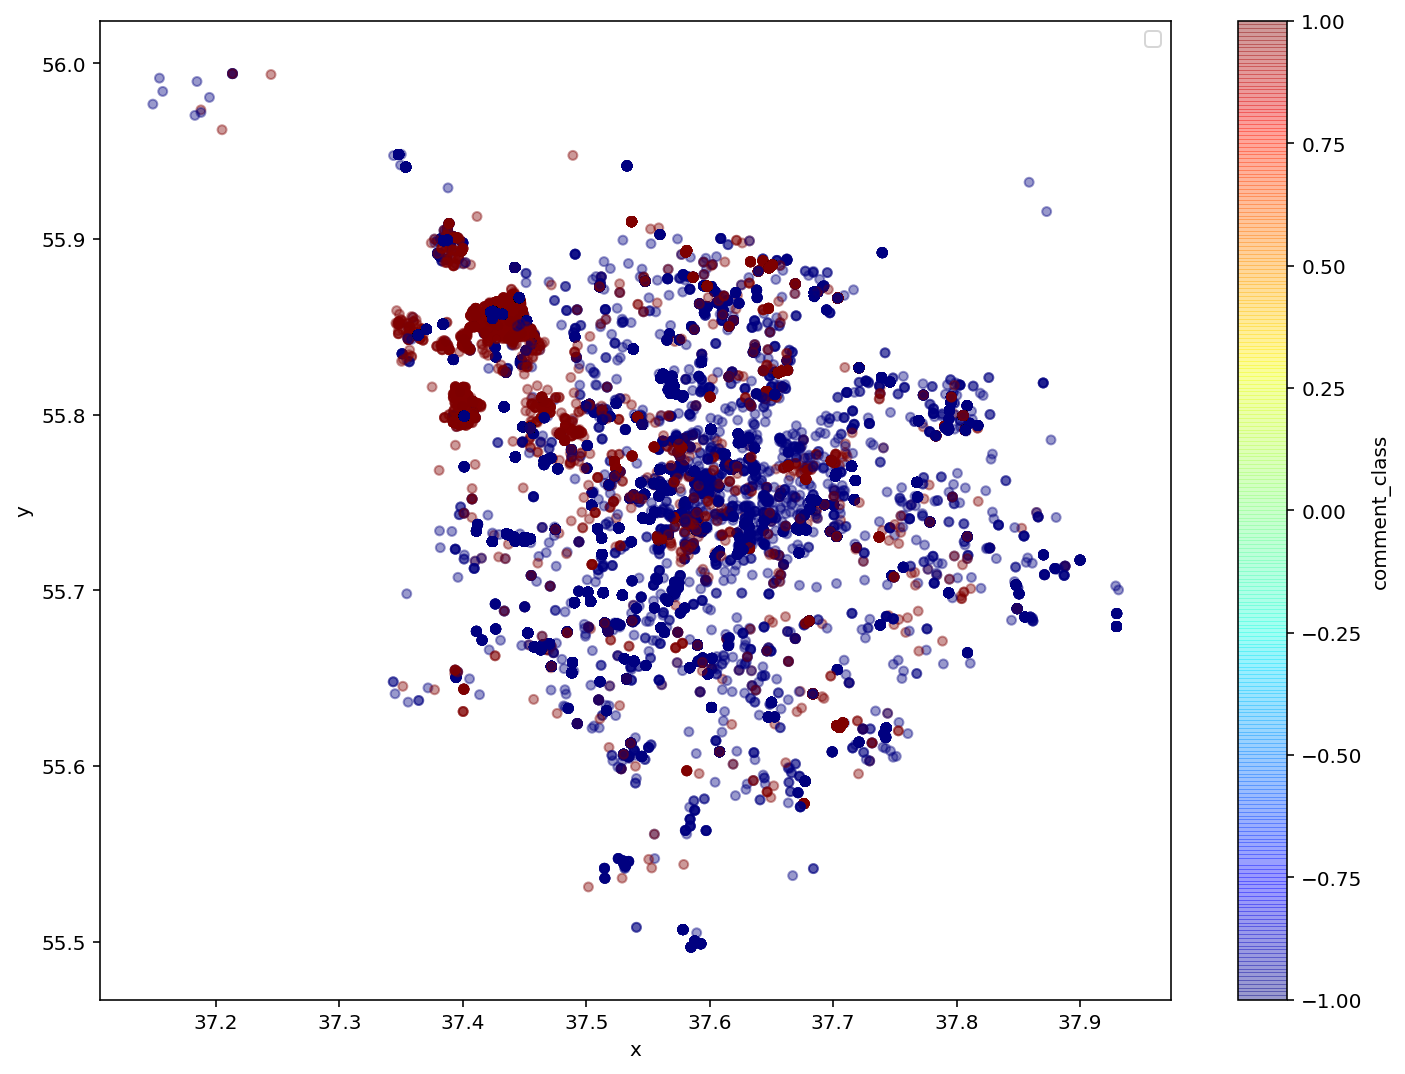

In [5]:
df1.plot(kind="scatter", x="x", y="y", alpha=0.4,
    c="comment_class", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [6]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [7]:
X = df1.drop(['comment_class'], axis=1)
Y = df1.comment_class

In [8]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters)

In [9]:
df1['cluster'] = km.fit_predict(X)

No handles with labels found to put in legend.


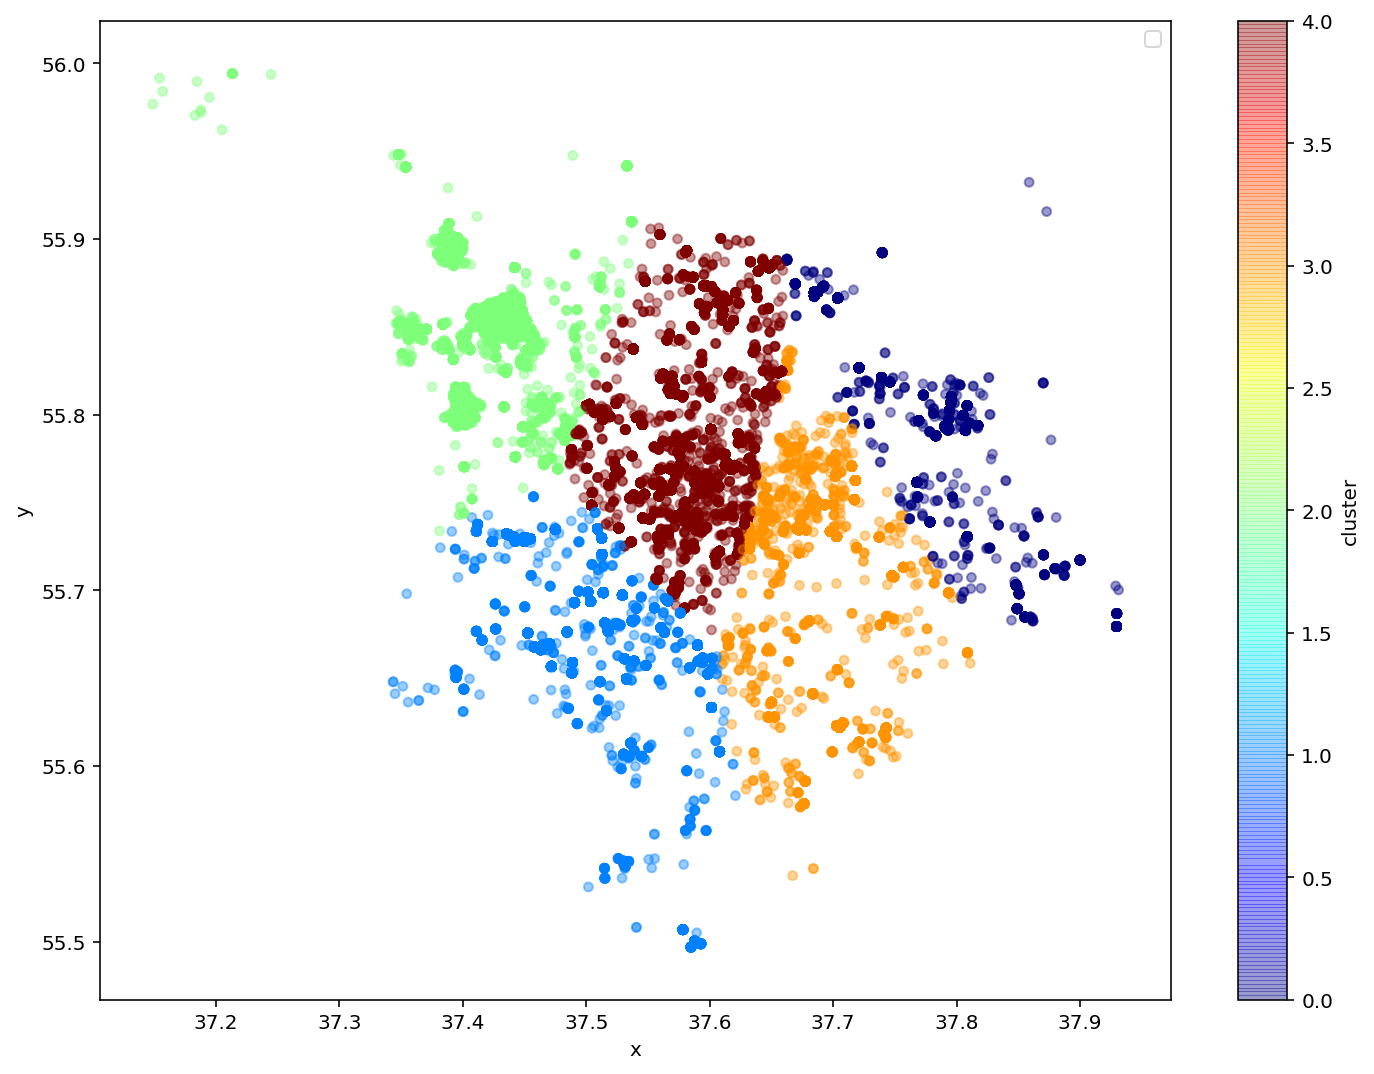

In [10]:
df1.plot(kind="scatter", x="x", y="y", alpha=0.4,
    c="cluster", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [11]:
df1.head()

,x,y,comment_class,cluster
0,37.612416,55.777454,-1,4
1,37.612416,55.777454,-1,4
2,37.603298,55.742108,-1,4
3,37.558526,55.728758,-1,4
4,37.566431,55.731794,-1,4


In [23]:
df2 = df1[df1['comment_class'] == 1]

In [24]:
X_2 = df2.drop(['comment_class'], axis=1)
Y_2 = df2.comment_class

In [25]:
df2['cluster'] = km.fit_predict(X_2)

C:\swsetup\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.


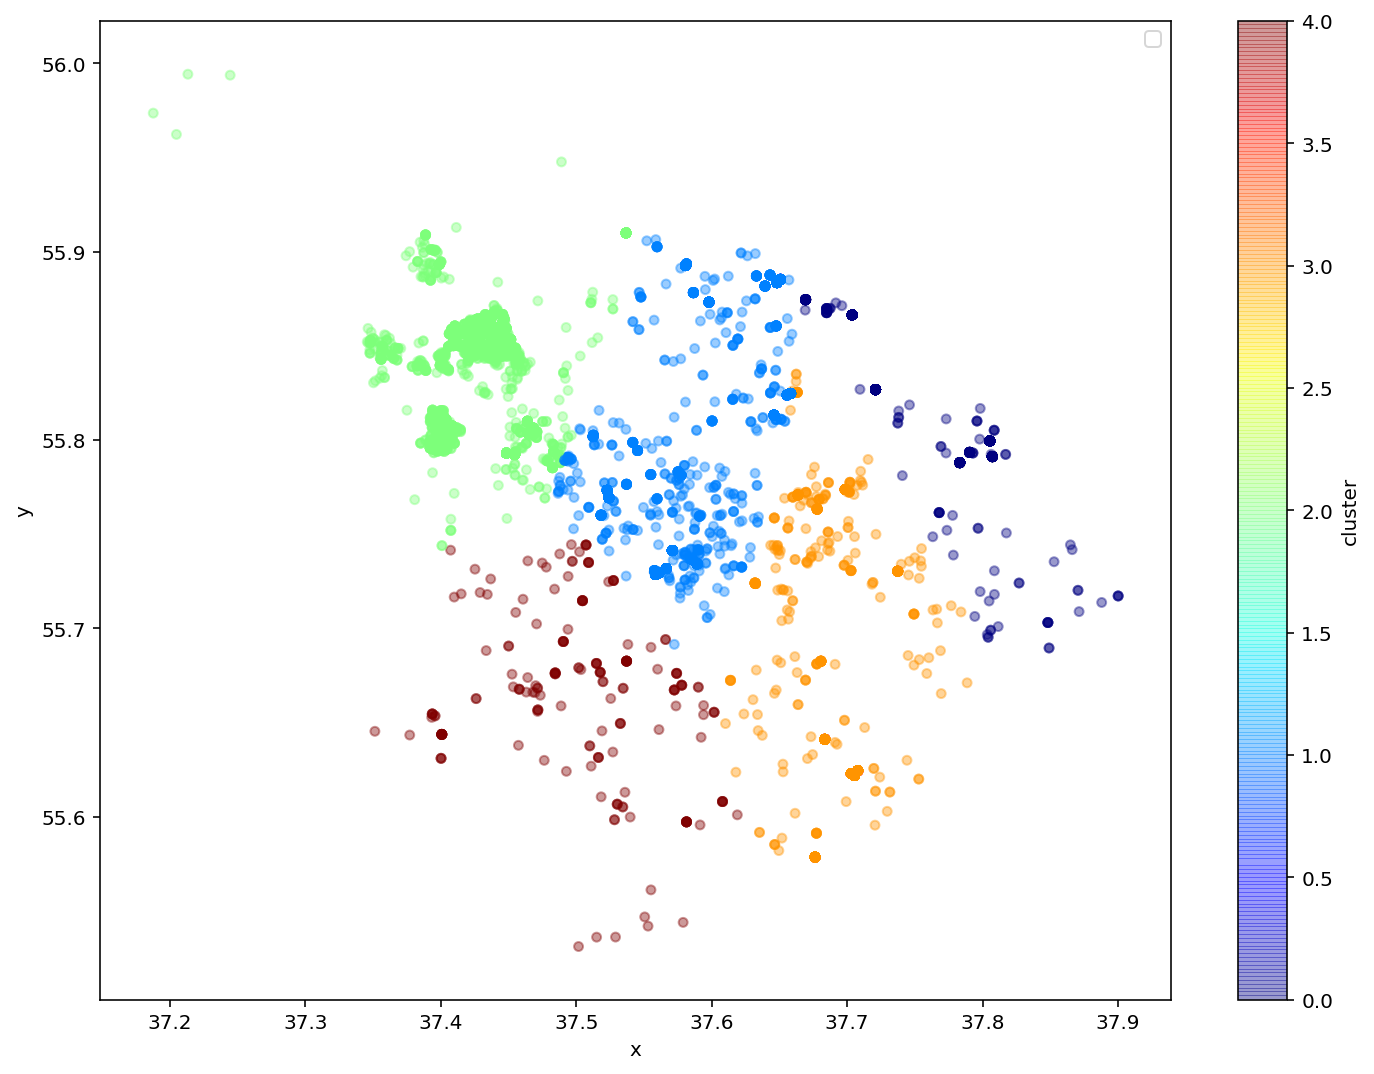

In [26]:
df2.plot(kind="scatter", x="x", y="y", alpha=0.4,
    c="cluster", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [27]:
df3 = df1[df1['comment_class'] == -1]

In [28]:
X_3 = df3.drop(['comment_class'], axis=1)
Y_3 = df3.comment_class

In [29]:
df3['cluster'] = km.fit_predict(X_3)

C:\swsetup\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.


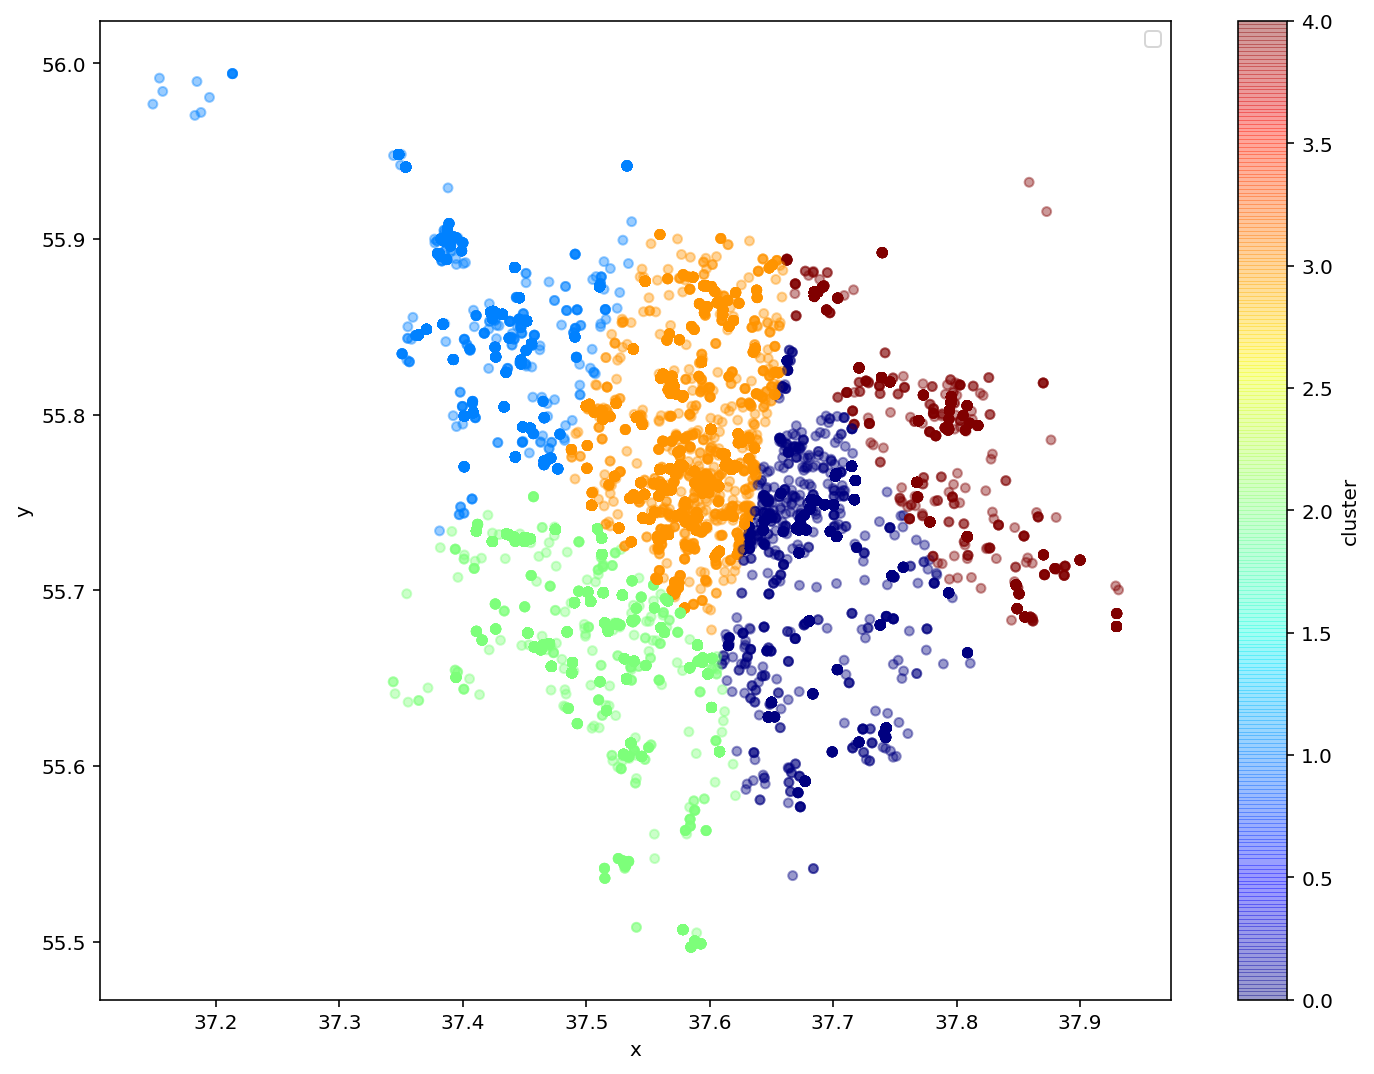

In [30]:
df3.plot(kind="scatter", x="x", y="y", alpha=0.4,
    c="cluster", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [33]:
#оптимальное число кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_3,)
    k_inertia.append(clf_kmeans.inertia_)

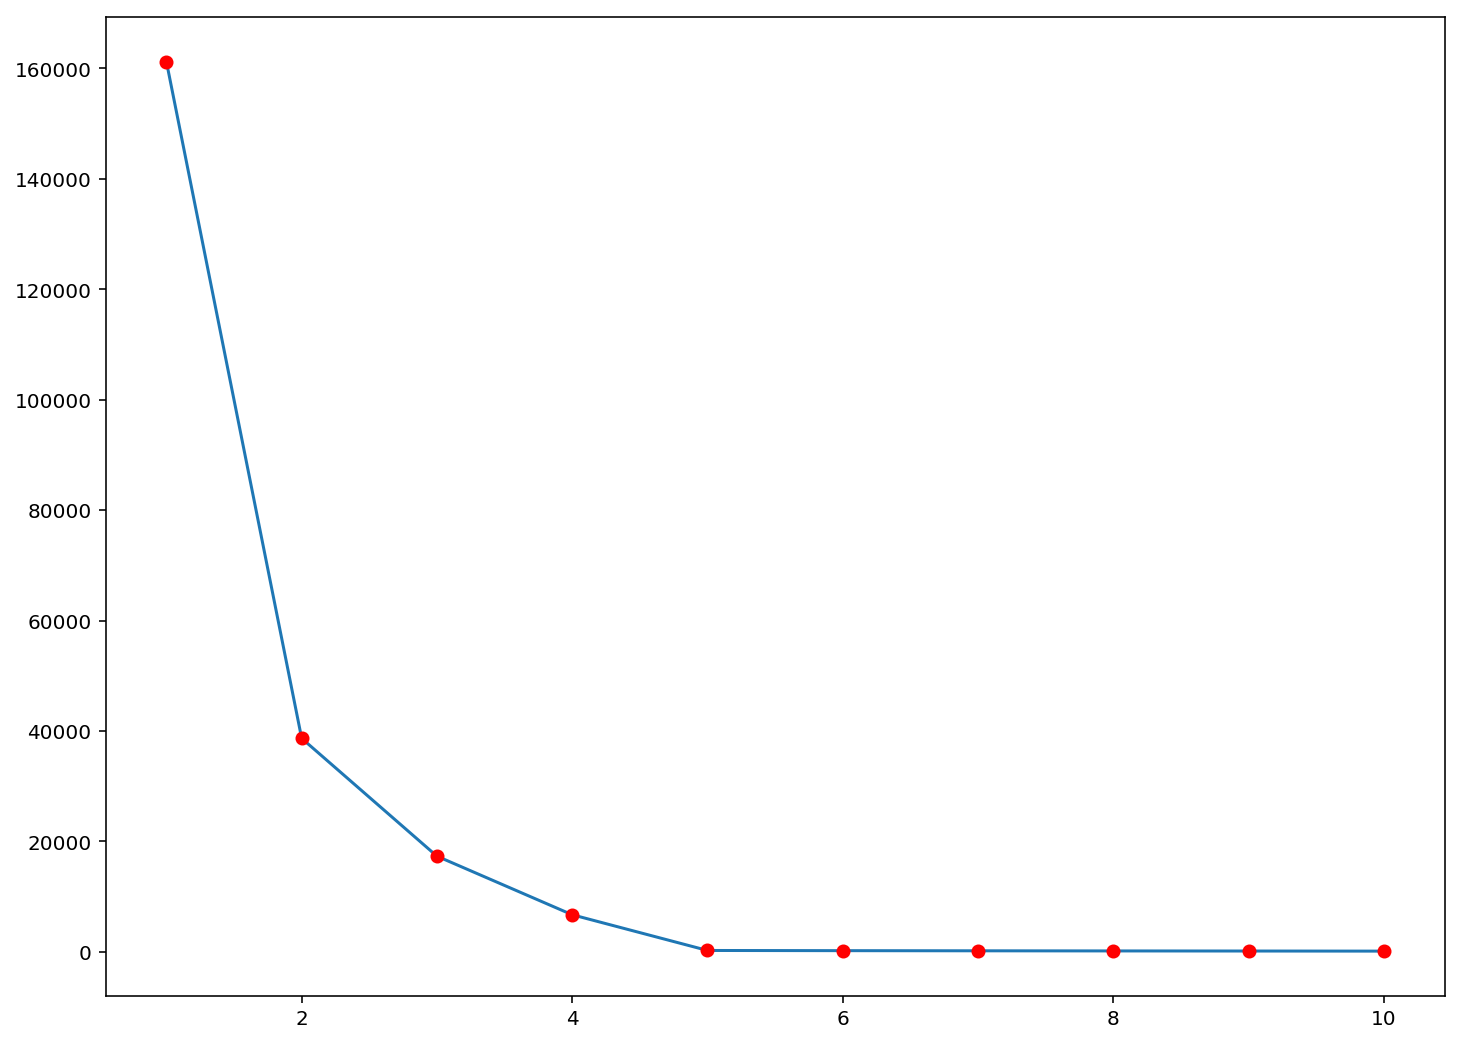

In [32]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')